<a href="https://colab.research.google.com/github/xtianu/UPC_DAPR_2025/blob/main/S2/S2.2_Clustering%20analysis_PRML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Data clustering:

Unsupervised algorithms that group data observations in clusters that share some structural similarities

# 2.1 The k-means algorithm:


[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge).

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations.


### Introductory Example

k-means with few observations

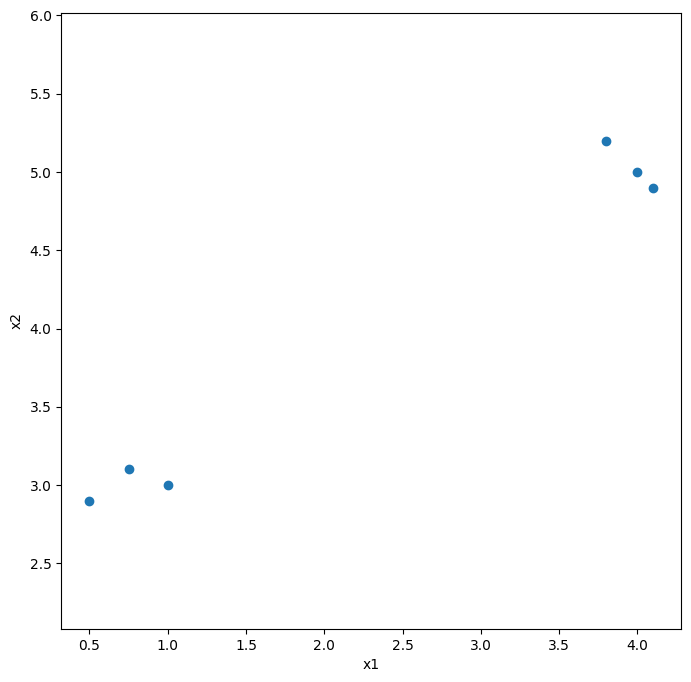

In [1]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[0 1 0 0 1 1]


In [3]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

group = KMeans(n_clusters=2).fit_predict(D)
df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group

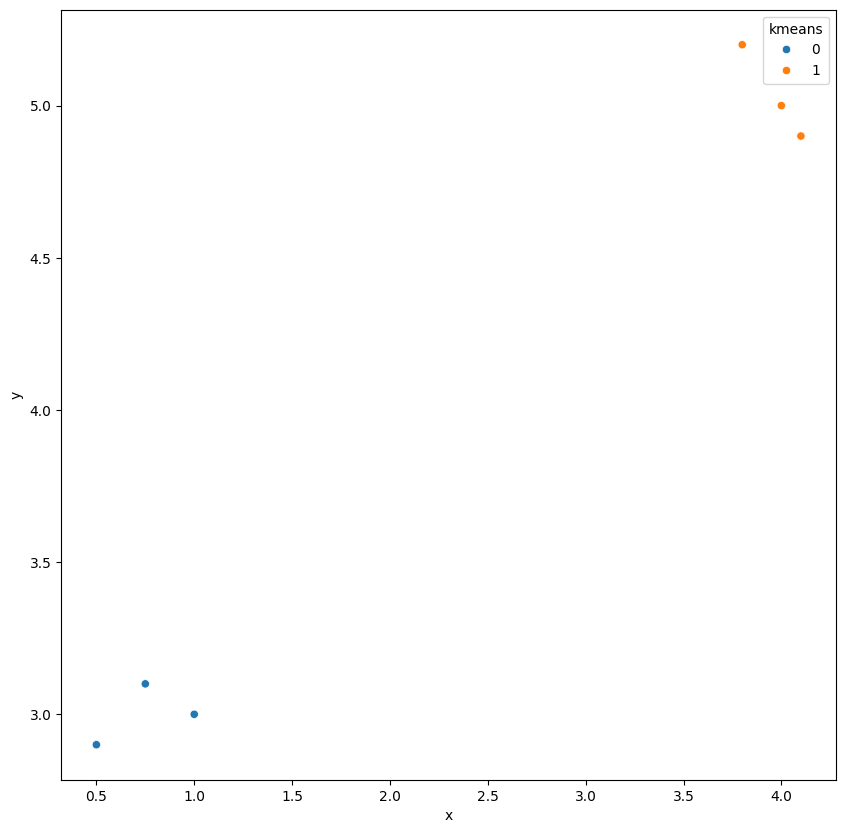

In [4]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTE: If we want to know more details about the clusters found, use the fit function and not fit_predict (the latter returns only the labels for assigning the observations to clusters, that is, the prediction of the k-means algorithm). Variables detail can be found at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Cluster labels {}'.format(kmeans_result.labels_))
print('Cluster centroids {}'.format(kmeans_result.cluster_centers_))
print('Number of iterations required {}'.format(kmeans_result.n_iter_))

Cluster labels [0 1 0 0 1 1]
Cluster centroids [[0.75       3.        ]
 [3.96666667 5.03333333]]
Number of iterations required 2


## Clustering synthetic blobs:

<Figure size 1200x1200 with 0 Axes>

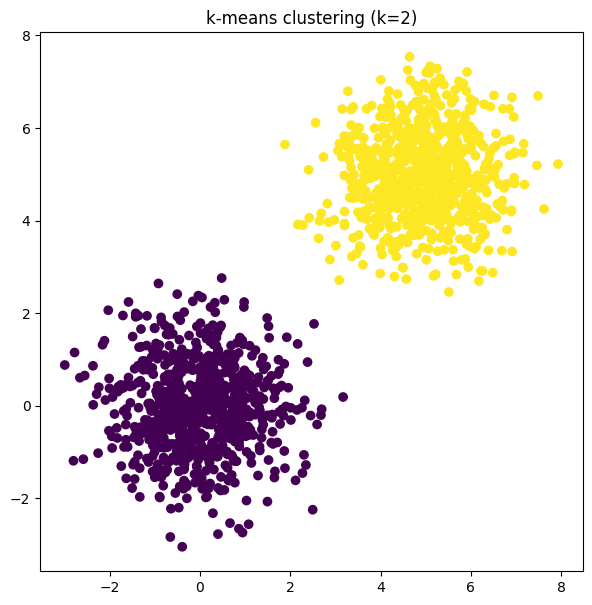

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
kmeans_labels = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(7,7))
labels = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title("k-means clustering (k=2)")
plt.show()

## Clustering synthetic data with different shapes:

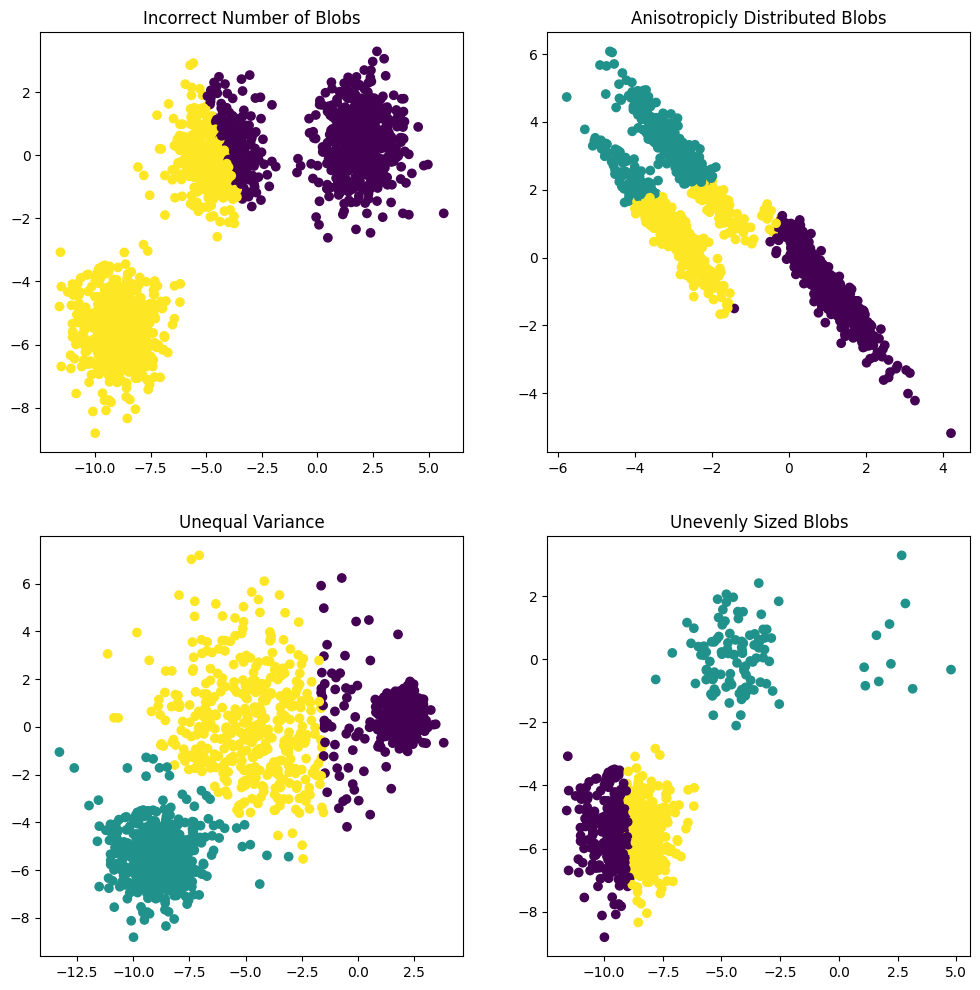

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

# 2.2 Hierarchical clustering (agglomerative clustering):


Sequence of partitions of the data into a set of clusters. They can be either agglomerative or Divisive:

- Divisive: Start with all observations in one cluster and slplit the clusters sequencially.

- Agglomerative: Start with as many cluster as observations and group them according to a cluster to cluster distance (linkage).

Consider two clusters $r$ and $s$ with $n_r$ and $n_s$ observations. A common cluster-cluster distances is:

\begin{equation*}
d_{min}(r,s) = \min \{ d(x_i^r,x_j^s) \}, \, i=1,\dots,n_r ; j=1,\dots,n_s
\end{equation*}
where $d(x_i^r,x_j^s)$ is the euclidean distance between observation $i$ in cluster $r$ and $j$ in cluster $s$.

Other commonly used cluster-cluster distances are:
\begin{eqnarray*}
d_{max}(r,s) &=& \max \{ d(x_i^r,x_j^s) \}, \, i=1,\dots,n_r ; j=1,\dots,n_s \\
d_{max}(r,s) &=& \frac{1}{n_s n_r}\sum_{i=1}^{n_r} \sum_{j=1}^{n_s} d(x_i^r,x_j^s)
\end{eqnarray*}



The agglomerative clustering algorithm:

[1] Specify the number of clusters $k$ to be found in data.

[2] Initizlize the number of clusters to the number of observations $N$.  

[3] Group the nearest two clusters based on a cluster-to-cluster distance.

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_{N-1}$.

[5] Repeat steps 3-4 until the number of clusters is $k$.  



## Introductory example and dendrogram:

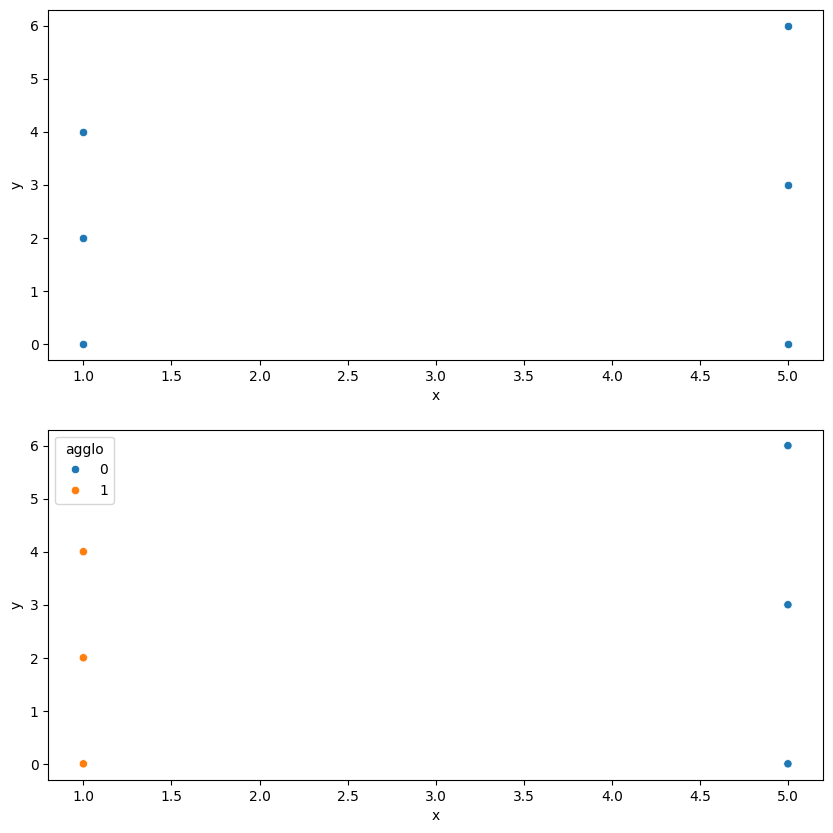

In [9]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[5, 6], [5, 3], [5, 0]])

df1 = pd.DataFrame(X,columns=['x','y'])


clustering = AgglomerativeClustering(n_clusters=2).fit(X)

clustering.labels_

df1['agglo']=clustering.labels_
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
sns.scatterplot(x='x',y='y',data=df1)
plt.subplot(212)
sns.scatterplot(x='x',y='y',hue='agglo',data=df1)
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'dcoord': [[0.0, np.float64(2.0), np.float64(2.0), 0.0],
  [0.0, np.float64(2.0), np.float64(2.0), np.float64(2.0)],
  [0.0, np.float64(3.0), np.float64(3.0), 0.0],
  [0.0, np.float64(3.0), np.float64(3.0), np.float64(3.0)],
  [np.float64(2.0), np.float64(4.0), np.float64(4.0), np.float64(3.0)]],
 'ivl': ['2', '0', '1', '3', '4', '5'],
 'leaves': [2, 0, 1, 3, 4, 5],
 'color_list': ['C1', 'C1', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C0', 'C0', 'C0']}

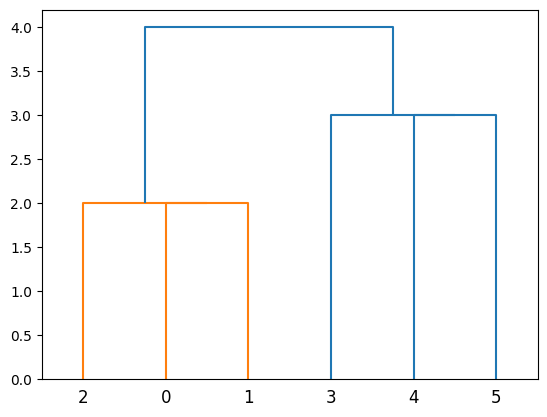

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)

## Example with synthetic blobs:

<Figure size 1200x1200 with 0 Axes>

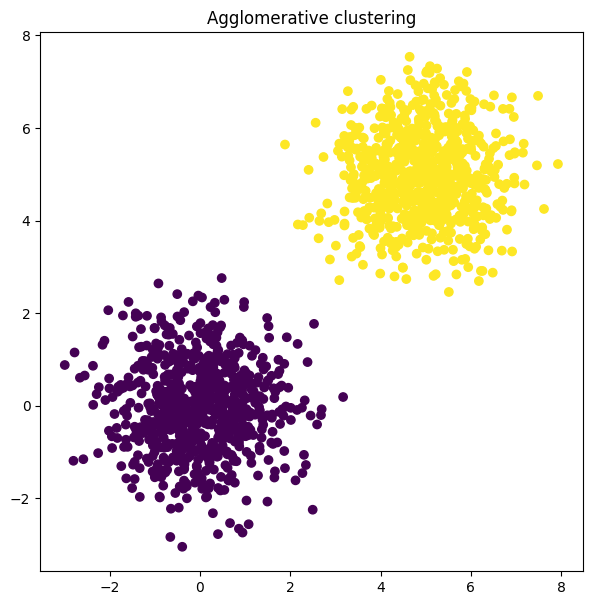

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
clustering = AgglomerativeClustering(compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2).fit(X)

plt.figure(figsize=(7,7))
labels = clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative clustering")
plt.show()

# 2.3 Gaussian Mixture Model Clustering

We model the distribution of the multidimensional observations using a mixture of gaussian distributions:

# $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma)$
# $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

<Figure size 1200x1200 with 0 Axes>

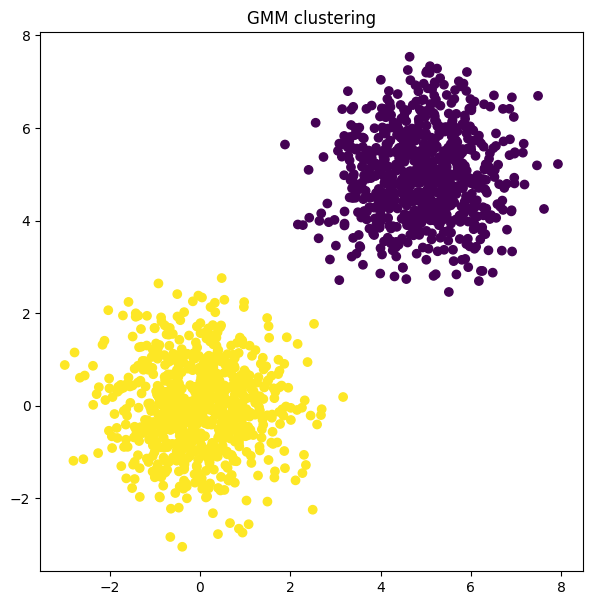

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

## Compare the three clustering methods:


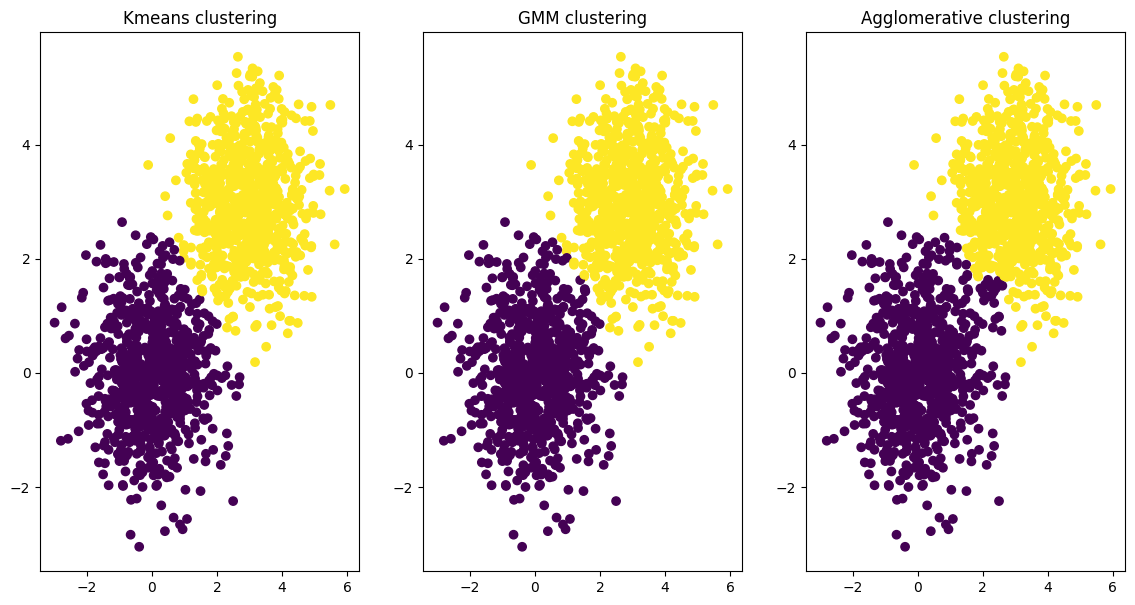

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering


# Generate data:
n_samples = 1500
centers = [(0, 0), (3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering().fit_predict(X)


# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(X)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

Compute the correct and incorrect clustering occurences in each method:


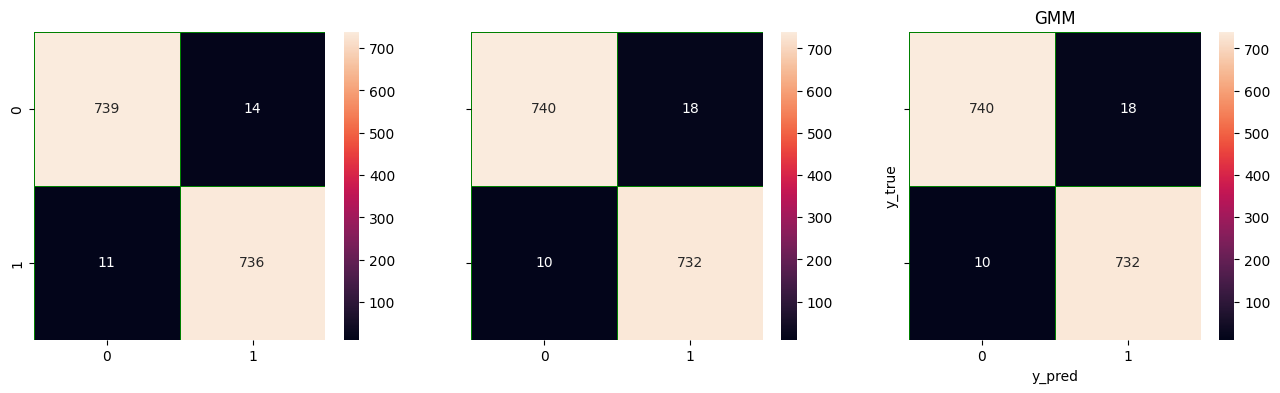

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(clust_kmeans, y)
cm2 = confusion_matrix(clust_agg, y)
cm3 = confusion_matrix(clust_gmm, y)

fig, ax = plt.subplots(1, 3, figsize=(16, 4),sharey=True)

sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[0])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Kmeans')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[1])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Agglomerative')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[2])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('GMM')
plt.show()

Let's use the adjusted Rand score to perform a quantitative evaluation of the clustering performance:


In [17]:
from sklearn.metrics.cluster import adjusted_rand_score
ARS_Kmeans = adjusted_rand_score(clust_kmeans, y)
ARS_agg = adjusted_rand_score(clust_agg, y)
ARS_gmm = adjusted_rand_score(clust_gmm, y)

print(ARS_Kmeans,ARS_agg,ARS_gmm)

0.9344006830919969 0.888546273348348 0.9266782028691233


## GMM model selection: How many clusters?:

A simple example on GMM model selection using BIC parsimomy index to select the optimal model (and hence optimal number of clusters in data):

[np.float64(17867.951265044227)]
[np.float64(17867.951265044227), np.float64(16609.971019993664)]
[np.float64(17867.951265044227), np.float64(16609.971019993664), np.float64(15462.00290783114)]
[np.float64(17867.951265044227), np.float64(16609.971019993664), np.float64(15462.00290783114), np.float64(14909.742461791768)]
[np.float64(17867.951265044227), np.float64(16609.971019993664), np.float64(15462.00290783114), np.float64(14909.742461791768), np.float64(14043.344008545771)]
[np.float64(17867.951265044227), np.float64(16609.971019993664), np.float64(15462.00290783114), np.float64(14909.742461791768), np.float64(14043.344008545771), np.float64(13936.550195946915)]
[np.float64(17867.951265044227), np.float64(16609.971019993664), np.float64(15462.00290783114), np.float64(14909.742461791768), np.float64(14043.344008545771), np.float64(13936.550195946915), np.float64(13978.609978392851)]
[np.float64(17867.951265044227), np.float64(16609.971019993664), np.float64(15462.00290783114), np.flo

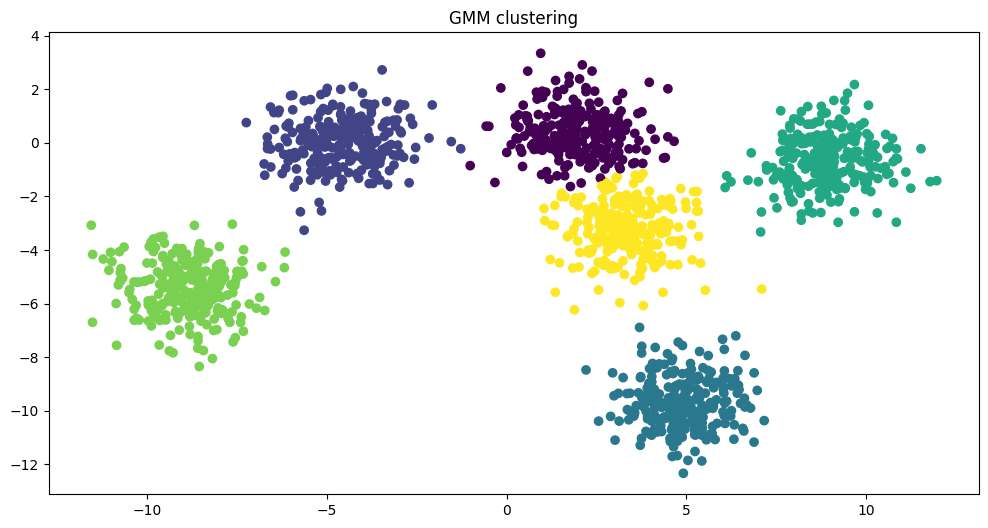

In [18]:
from sklearn.datasets import make_blobs
import numpy as np

n_clusters = 6
n_samples = 1500
random_state = 170
#X, y = make_blobs(n_samples=n_samples, centers=[[-5,-5],[0,0],[5,5]], cluster_std = [2,2,2], n_features=2,random_state=random_state)
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2,random_state=random_state)

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

## Different covariance matrix structures:

Automatically created module for IPython interactive environment


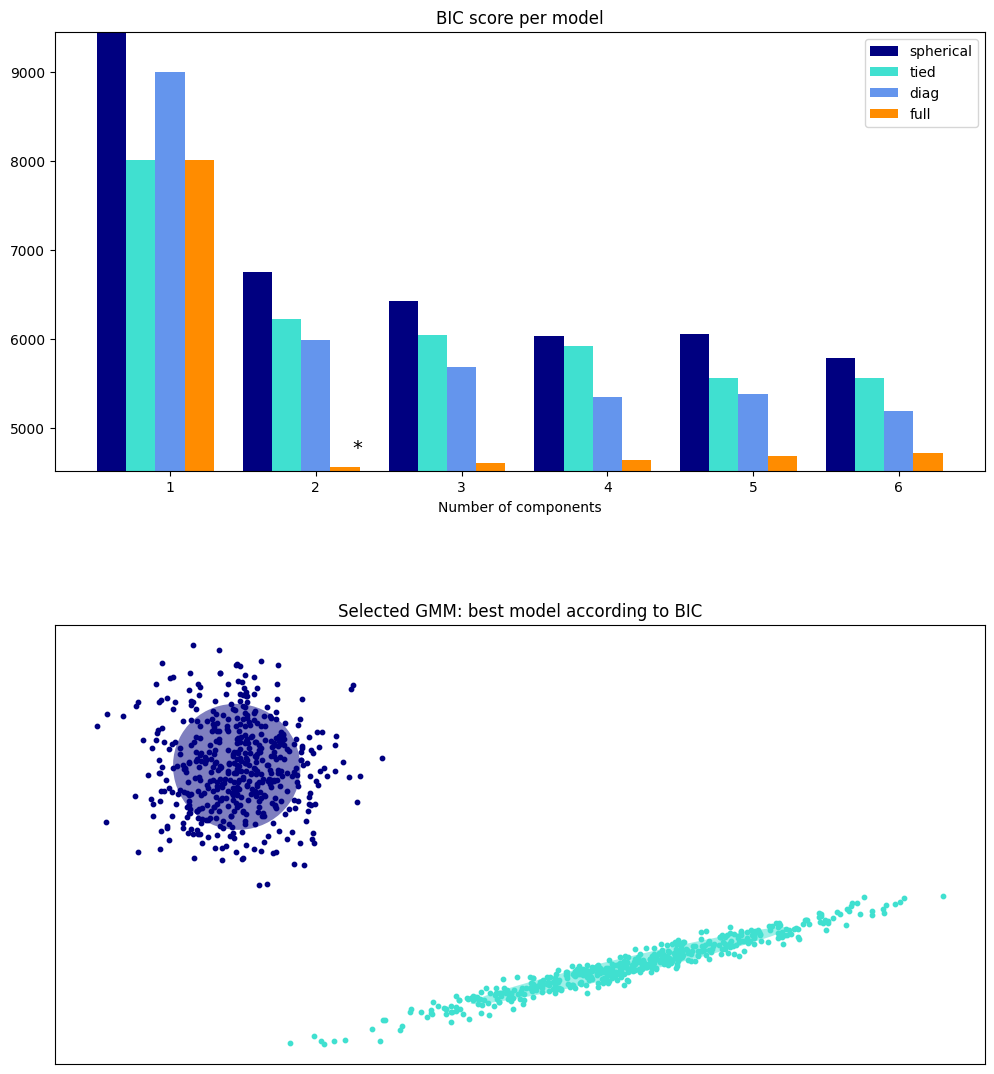

In [28]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sklearn import mixture

print(__doc__ if '__doc__' in globals() else '')

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.inf
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
best_gmm = None

for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type,
                                      random_state=0)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)

# Plot BIC
color_list = ['navy', 'turquoise', 'cornflowerblue', 'darkorange']
color_iter = itertools.cycle(color_list)
clf = best_gmm
bars = []

plt.figure(figsize=(12, 12))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, itertools.cycle(color_list))):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)

# reset color iterator for the scatter/ellipses
color_iter = itertools.cycle(color_list)

n_components = clf.means_.shape[0]
n_features = clf.means_.shape[1]

for i, mean in enumerate(clf.means_):
    color = next(color_iter)

    # Obtain the 2x2 covariance matrix for this component in a robust way
    if clf.covariance_type == 'full':
        cov = clf.covariances_[i]
    elif clf.covariance_type == 'tied':
        cov = clf.covariances_
    elif clf.covariance_type == 'diag':
        # diag gives per-component variances for each feature
        cov = np.diag(clf.covariances_[i])
    elif clf.covariance_type == 'spherical':
        # spherical gives one variance per component
        cov = np.eye(n_features) * clf.covariances_[i]
    else:
        raise ValueError(f"Unknown covariance_type: {clf.covariance_type}")

    # Stabilize covariance and compute eigenvalues/eigenvectors
    cov = cov + 1e-6 * np.eye(cov.shape[0])
    v, w = linalg.eigh(cov)

    if not np.any(Y_ == i):
        continue

    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], s=10, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0, 1], w[0, 0])
    angle_deg = 180. * angle / np.pi  # convert to degrees
    width_height = 2. * np.sqrt(2.) * np.sqrt(v)  # width, height

    # Only draw ellipse if positive sizes
    if width_height[0] > 0 and width_height[1] > 0:
        ell = Ellipse(xy=tuple(mean),
                      width=width_height[0],
                      height=width_height[1],
                      angle=180. + angle_deg)
        ell.set_facecolor(color)
        ell.set_alpha(.5)
        splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: best model according to BIC')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()
